In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! git clone https://github.com/Klemersoncastro/google_trends_covid
%cd google_trends_covid/dados

Cloning into 'google_trends_covid'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 102 (delta 30), reused 46 (delta 14), pack-reused 37
Receiving objects: 100% (102/102), 743.83 KiB | 4.56 MiB/s, done.
Resolving deltas: 100% (39/39), done.
/content/google_trends_covid/dados


In [3]:
# Lendo base de dados
df_casosCovidDiario_br = pd.read_csv('Covid + trend diário Brasil - normalizado.csv', index_col=0)

In [4]:
# Visualizando as Trends e os casos de covid no Brasil
df_casosCovidDiario_br

,date,covid,coronavirus,falta_de_ar,febre,tosse,perda_paladar,perda_olfato,new_confirmed,new_deaths,new_confirmed_n,new_deaths_n
0,2020-01-01,0,0,18.0,26.0,25.0,0.0,0.0,0,0,0.000000,0.000000
1,2020-01-02,0,0,23.0,32.0,30.0,0.0,0.0,0,0,0.000000,0.000000
2,2020-01-03,0,0,23.0,27.0,25.0,0.0,5.0,0,0,0.000000,0.000000
3,2020-01-04,0,0,21.0,39.0,29.0,0.0,5.0,0,0,0.000000,0.000000
4,2020-01-05,0,0,20.0,33.0,34.0,0.0,0.0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
419,2021-02-23,83,56,59.0,88.0,75.0,17.0,26.0,63588,1358,70.835144,86.167513
420,2021-02-24,85,61,61.0,87.0,81.0,35.0,34.0,65387,1446,72.839176,91.751269
421,2021-02-25,88,69,51.0,94.0,75.0,41.0,38.0,68141,1576,75.907050,100.000000
422,2021-02-26,96,65,50.0,73.0,73.0,29.0,18.0,63530,1340,70.770533,85.025381


In [6]:
# Transformando as datas em tipo date
df_casosCovidDiario_br['date'] = pd.to_datetime(df_casosCovidDiario_br['date'])

### Analisando as correlações

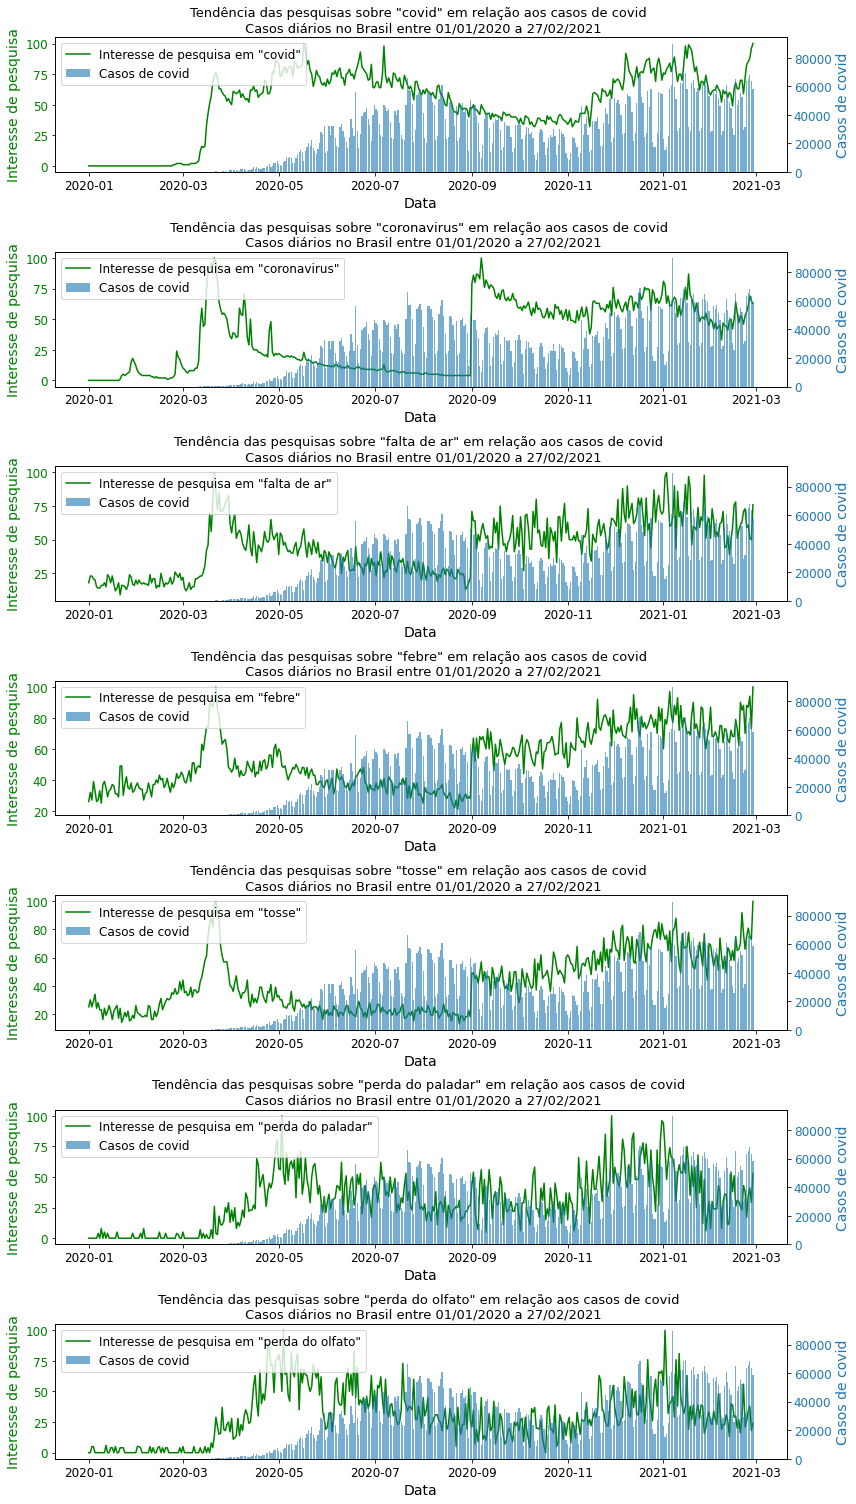

In [47]:
keywords = ['covid','coronavirus','falta de ar','febre','tosse','perda do paladar','perda do olfato']
keywords_dataset = ['covid','coronavirus','falta_de_ar','febre','tosse','perda_paladar','perda_olfato']
fig, ax = plt.subplots(len(keywords_dataset), 1, figsize=(12,len(keywords_dataset)*3), sharey=False)
i = 0
for keyword in zip(keywords,keywords_dataset):
  ax[i].set_title('Tendência das pesquisas sobre "' + keyword[0] + '" em relação aos casos de covid \n Casos diários no Brasil entre 01/01/2020 a 27/02/2021', fontsize=13)
  color = 'green'
  ax[i].plot(df_casosCovidDiario_br['date'],df_casosCovidDiario_br[keyword[1]], label='Interesse de pesquisa em "' + keyword[0] + '"', color=color)
  ax[i].set_ylabel('Interesse de pesquisa', color=color, fontsize=14)
  ax[i].tick_params(axis='y', labelcolor=color, labelsize=12)
  ax[i].tick_params(axis='x', which='both', labelsize=12)
  ax[i].set_xlabel('Data', fontsize=14)
  ax2 = ax[i].twinx()
  color = 'tab:blue'
  ax2.bar(df_casosCovidDiario_br['date'],df_casosCovidDiario_br['new_confirmed'], alpha=0.6, label='Casos de covid', color=color)
  ax2.set_ylabel('Casos de covid', color=color, fontsize=14)
  ax2.tick_params(axis='y', labelcolor=color, labelsize=12)
  lines, labels = ax[i].get_legend_handles_labels()
  lines2, labels2 = ax2.get_legend_handles_labels()
  ax[i].legend(lines + lines2, labels + labels2, loc='upper left', fontsize=12)
  i = i + 1
fig.tight_layout()